# Summarising a video in a single image

### Downlaod youtube audio

In [28]:
from __future__ import unicode_literals
import youtube_dl
# might need ffmpeg support

# Audio is the folder I wanna store the downloaded audio in

ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'Audio/%(title)s.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}

#replace the argument of ydl.download with the required URL
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    meta = ydl.extract_info('https://www.youtube.com/watch?v=ruM4Xxhx32U', download=True) 
    title = meta['title']
print(title)


[youtube] ruM4Xxhx32U: Downloading webpage
[youtube] ruM4Xxhx32U: Downloading video info webpage
[download] Destination: Audio\How the heart actually pumps blood - Edmond Hui.webm
[download] 100% of 4.20MiB in 00:01                  
[ffmpeg] Destination: Audio\How the heart actually pumps blood - Edmond Hui.mp3
Deleting original file Audio\How the heart actually pumps blood - Edmond Hui.webm (pass -k to keep)
How the heart actually pumps blood - Edmond Hui


### Converting .mp3 to.wav files with which speech recognizer can work

In [29]:
from pydub import AudioSegment

audio_path = 'Audio/'
sound = AudioSegment.from_mp3(audio_path+ title + ".mp3")
sound.export(audio_path + title + ".wav", format="wav")

<_io.BufferedRandom name='Audio/How the heart actually pumps blood - Edmond Hui.wav'>

### Importing SpeechRecognition

In [30]:
import speech_recognition as sr
print(sr.__version__)

3.8.1


### The Recognizer Class

In [31]:
r = sr.Recognizer()

### Chunking the audio files

In [32]:
# Input audio file to be sliced 
audio = AudioSegment.from_wav(audio_path + title + ".wav") 
  
''' 
Step #1 - Slicing the audio file into smaller chunks. 
'''
# Length of the audiofile in milliseconds 
n = len(audio) 
  
# Variable to count the number of sliced chunks 
counter = 1
  
# Text file to write the recognized audio 
fh = open("recognized.txt", "w+") 
  
# Interval length at which to slice the audio file. 
interval = 45* 1000
  
# Length of audio to overlap.  
overlap = 1.5 * 1000
  
# Initialize start and end seconds to 0 
start = 0
end = 0
  
# Flag to keep track of end of file. 
# When audio reaches its end, flag is set to 1 and we break 
flag = 0
  
# Iterate from 0 to end of the file, 
# with increment = interval 
for i in range(0, 2 * n, interval): 
      
    # During first iteration, 
    # start is 0, end is the interval 
    if i == 0: 
        start = 0
        end = interval 
  
    # All other iterations, 
    # start is the previous end - overlap 
    # end becomes end + interval 
    else: 
        start = end - overlap 
        end = start + interval  
  
    # When end becomes greater than the file length, 
    # end is set to the file length 
    # flag is set to 1 to indicate break. 
    if end >= n: 
        end = n 
        flag = 1
  
    # Storing audio file from the defined start to end 
    chunk = audio[start:end] 
  
    # Filename / Path to store the sliced audio 
    filename = 'chunk'+str(counter)+'.wav'
  
    # Store the sliced audio file to the defined path 
    chunk.export(audio_path + filename, format ="wav") 
    # Print information about the current chunk 
    print("Processing chunk "+str(counter)+". Start = "
                        +str(start)+" end = "+str(end)) 
  
    # Increment counter for the next chunk 
    counter = counter + 1
      
    # Slicing of the audio file is done. 
    # Skip the below steps if there is some other usage 
    # for the sliced audio files. 
  
      
    ''' 
    Step #2 - Recognizing the chunk and writing to a file. 
    '''
  
    # Here, Google Speech Recognition is used 
    # to take each chunk and recognize the text in it. 
  
    # Specify the audio file to recognize 
  
    AUDIO_FILE = filename 
  
    # Initialize the recognizer 
    r = sr.Recognizer() 
  
    # Traverse the audio file and listen to the audio 
    with sr.AudioFile(audio_path + AUDIO_FILE) as source: 
        audio_listened = r.listen(source) 
  
    # Try to recognize the listened audio 
    # And catch expections. 
    try:     
        rec = r.recognize_google(audio_listened) 
        #print(rec)
        # If recognized, write into the file. 
        fh.write(rec+" ") 
      
    # If google could not understand the audio 
    except sr.UnknownValueError: 
        print("Could not understand audio") 
  
    # If the results cannot be requested from Google. 
    # Probably an internet connection error. 
    except sr.RequestError as e: 
        print("Could not request results.") 
  
    # Check for flag. 
    # If flag is 1, end of the whole audio reached. 
    # Close the file and break. 
    if flag == 1: 
        fh.close() 
        break

Processing chunk 1. Start = 0 end = 45000
Processing chunk 2. Start = 43500.0 end = 88500.0
Processing chunk 3. Start = 87000.0 end = 132000.0
Processing chunk 4. Start = 130500.0 end = 175500.0
Processing chunk 5. Start = 174000.0 end = 219000.0
Processing chunk 6. Start = 217500.0 end = 262500.0
Processing chunk 7. Start = 261000.0 end = 267436
Could not understand audio


### Generating a word cloud

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#read the recognized text
with open('recognized.txt', 'r') as file:
    text = file.read()

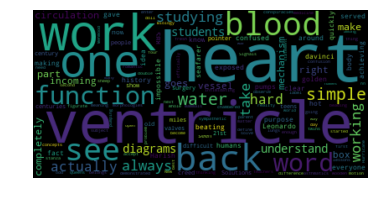

In [35]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

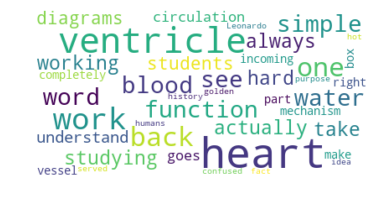

In [38]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

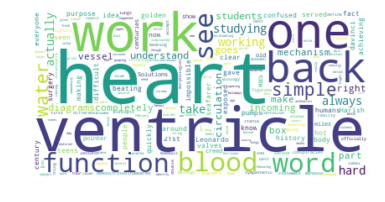

In [39]:
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Save the image in the img folder:
wordcloud.to_file("Image/visual_summary1.png")